# Clustering & PCA Assignment
### The main task is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. 
### Then you need to suggest the countries which the CEO needs to focus on the most.

In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Importing DataSet and read the data

In [2]:
# Importing the dataset
country_data = pd.read_csv("Country-data.csv",sep = ',',index_col = 0,encoding = "ISO-8859-1")
country_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


## Inspect to find column wise null count

In [4]:
# Write your code for column-wise null count here
country_data.isnull().sum(axis=0)

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Check for missing values

In [5]:
# Checking the percentage of missing values
round(100*(country_data.isnull().sum()/len(country_data.index)), 2)

child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

### Checking for Outliers

In [6]:
# Checking for outliers in the continuous variables
num_country_data = country_data[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_country_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


## Find the outliers
### Mostly all columns have outliers

In [7]:
Q1 = num_country_data.quantile(0.25)
Q3 = num_country_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

child_mort       53.850
exports          27.550
health            3.680
imports          28.550
income        19445.000
inflation         8.940
life_expec       11.500
total_fer         2.085
gdpp          12720.000
dtype: float64


## Let us do outlier treatment after PCA so that less number of columns would be treated.

## Let us check the correlation between the variables before performing PCA

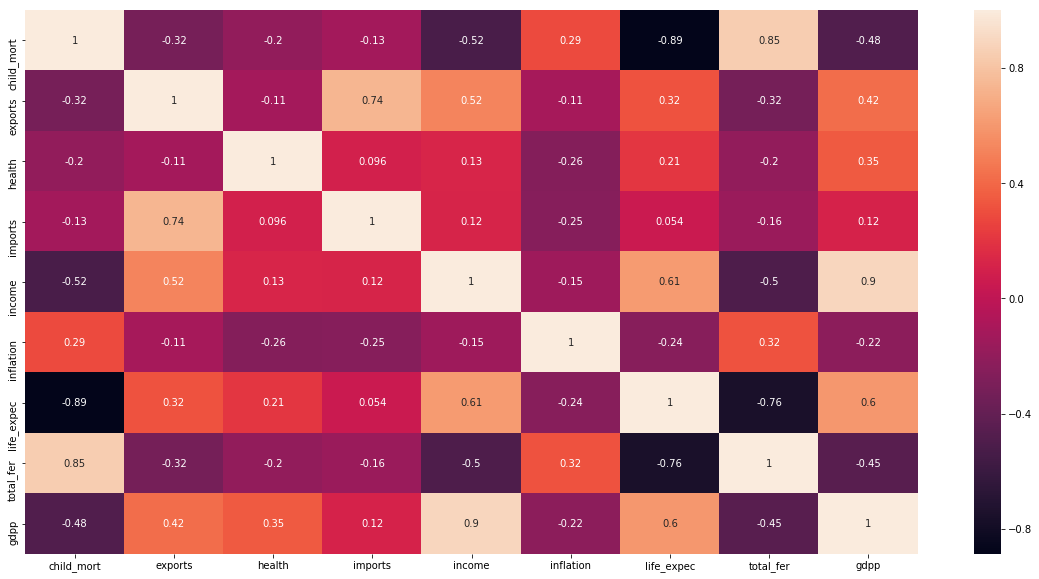

In [8]:
#plot heatmap for all the varuables in dataframe to find co-relation
plt.figure(figsize=(20,10))
sns.heatmap(country_data.corr(),annot=True)

### child_mort and total_fer are highly correlated
### exports and imports are highly correlated. It also has some co-relation with income and gdpp
### income has correlation with gdpp. Also have with exports and life_expec.
### gdpp has co-relation with life_expec and exports too

## No need to drop highly correlated variables as they will be taken care by PCA
## Hence we should go for PCA(Principal Component Analysis) for dimensionality reduction


In [9]:
# Normalising continuous features
df = country_data[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


### Standadisation using StandardScaler

In [10]:
# Importing standardscalar module  
from sklearn.preprocessing import StandardScaler
# Standardize the feature matrix
X_std = StandardScaler().fit_transform(df)
X_std.shape[1]

9

### Covariance Matrix

In [11]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.0060241  -0.32000945 -0.2016093  -0.12797725 -0.52747354  0.29001277
  -0.89201752  0.85358942 -0.485942  ]
 [-0.32000945  1.0060241  -0.11509761  0.74182289  0.51989676 -0.10794074
   0.3182181  -0.32193832  0.42124719]
 [-0.2016093  -0.11509761  1.0060241   0.09629328  0.1303592  -0.2569142
   0.21196135 -0.19785877  0.34804965]
 [-0.12797725  0.74182289  0.09629328  1.0060241   0.12314364 -0.2484822
   0.05471819 -0.16000656  0.11619394]
 [-0.52747354  0.51989676  0.1303592   0.12314364  1.0060241  -0.14864609
   0.61564899 -0.50486319  0.90096644]
 [ 0.29001277 -0.10794074 -0.2569142  -0.2484822  -0.14864609  1.0060241
  -0.24114897  0.31883023 -0.22296618]
 [-0.89201752  0.3182181   0.21196135  0.05471819  0.61564899 -0.24114897
   1.0060241  -0.76545827  0.60370413]
 [ 0.85358942 -0.32193832 -0.19785877 -0.16000656 -0.50486319  0.31883023
  -0.76545827  1.0060241  -0.45765069]
 [-0.485942    0.42124719  0.34804965  0.11619394  0.90096644 -0.22296618

### Eigendecomposition on covariance matrix
### Find Eigenvectors and Eigen values

In [12]:
#Perform eigendecomposition on covariance matrix
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.41951945  0.19288394 -0.02954353  0.37065326  0.16896968  0.20062815
   0.3275418   0.68274306 -0.07948854]
 [ 0.28389698  0.61316349  0.14476069  0.00309102 -0.05761584 -0.05933283
  -0.12308207  0.01419742 -0.70730269]
 [ 0.15083782 -0.24308678 -0.59663237  0.4618975  -0.51800037  0.00727646
   0.11308797 -0.07249683 -0.24983051]
 [ 0.16148244  0.67182064 -0.29992674 -0.07190746 -0.25537642 -0.03003154
   0.09903717  0.02894642  0.59218953]
 [ 0.39844111  0.02253553  0.3015475   0.39215904  0.2471496   0.16034699
   0.61298247 -0.35262369  0.09556237]
 [-0.19317293 -0.00840447  0.64251951  0.15044176 -0.7148691   0.06628537
  -0.02523614  0.01153775  0.10463252]
 [ 0.42583938 -0.22270674  0.11391854 -0.20379723 -0.1082198  -0.60112652
   0.29403981  0.50466425  0.01848639]
 [-0.40372896  0.15523311  0.01954925  0.37830365  0.13526221 -0.75068875
  -0.02633585 -0.29335267  0.02882643]
 [ 0.39264482 -0.0460224   0.12297749  0.53199457  0.18016662  0.01677876
  -0.625

## Explained variance through Scree plot

In [13]:
# Importing PCA 
from sklearn.decomposition import PCA 
#Fitting the PCA algorithm with our Data
pca = PCA().fit(X_std)
print(pca.explained_variance_ratio_)

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


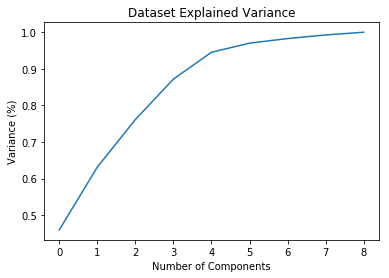

In [14]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

## Performing IncreamentalPCA

In [15]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [16]:
df_incre_pca = pca_final.fit_transform(X_std)
df_incre_pca.shape

(167, 4)

## PCA Scree plot shows 4 components at 95%

In [17]:
pca = PCA(n_components=4)
pca_2d =pca.fit_transform(X_std)
pca_df_2d = pd.DataFrame(pca_2d)
pca_df_2d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
0    167 non-null float64
1    167 non-null float64
2    167 non-null float64
3    167 non-null float64
dtypes: float64(4)
memory usage: 5.3 KB


#### Original dataframe

In [18]:
print(X_std.shape)

(167, 9)


#### dataframe after dimensionality reduction after PCA

In [19]:
print(pca_df_2d.shape)

(167, 4)


In [20]:
pca_df_2d.head()

,0,1,2,3
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063


In [21]:
print(abs(pca.components_))

[[0.41951945 0.28389698 0.15083782 0.16148244 0.39844111 0.19317293
  0.42583938 0.40372896 0.39264482]
 [0.19288394 0.61316349 0.24308678 0.67182064 0.02253553 0.00840447
  0.22270674 0.15523311 0.0460224 ]
 [0.02954353 0.14476069 0.59663237 0.29992674 0.3015475  0.64251951
  0.11391854 0.01954925 0.12297749]
 [0.37065326 0.00309102 0.4618975  0.07190746 0.39215904 0.15044176
  0.20379723 0.37830365 0.53199457]]


In [22]:
print (pd.DataFrame(pca.components_,columns=df.columns,index = ['PC1', 'PC2','PC3', 'PC4']))

     child_mort   exports    health   imports    income  inflation  \
PC1   -0.419519  0.283897  0.150838  0.161482  0.398441  -0.193173   
PC2    0.192884  0.613163 -0.243087  0.671821  0.022536  -0.008404   
PC3   -0.029544  0.144761 -0.596632 -0.299927  0.301548   0.642520   
PC4    0.370653  0.003091  0.461897 -0.071907  0.392159   0.150442   

     life_expec  total_fer      gdpp  
PC1    0.425839  -0.403729  0.392645  
PC2   -0.222707   0.155233 -0.046022  
PC3    0.113919   0.019549  0.122977  
PC4   -0.203797   0.378304  0.531995  


In [23]:
pca_original_df=pd.DataFrame(pca.components_,columns=df.columns,index = ['PC1', 'PC2','PC3', 'PC4'])
pca_original_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
PC1,-0.419519,0.283897,0.150838,0.161482,0.398441,-0.193173,0.425839,-0.403729,0.392645
PC2,0.192884,0.613163,-0.243087,0.671821,0.022536,-0.008404,-0.222707,0.155233,-0.046022
PC3,-0.029544,0.144761,-0.596632,-0.299927,0.301548,0.642520,0.113919,0.019549,0.122977
PC4,0.370653,0.003091,0.461897,-0.071907,0.392159,0.150442,-0.203797,0.378304,0.531995


#### Dataframe created with 4 principal components with Country as index

In [24]:
pca_df_2d.index = country_data.index
pca_df_2d.columns = ['PC1', 'PC2','PC3', 'PC4']
pca_df_2d.head()

,PC1,PC2,PC3,PC4
country,,,,
Afghanistan,-2.913025,0.095621,-0.718118,1.005255
Albania,0.429911,-0.588156,-0.333486,-1.161059
Algeria,-0.285225,-0.455174,1.221505,-0.868115
Angola,-2.932423,1.695555,1.525044,0.839625
Antigua and Barbuda,1.033576,0.136659,-0.225721,-0.847063


In [25]:
pca_df_2d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 4 columns):
PC1    167 non-null float64
PC2    167 non-null float64
PC3    167 non-null float64
PC4    167 non-null float64
dtypes: float64(4)
memory usage: 6.5+ KB


In [26]:
pca_df_2d.head(10)

,PC1,PC2,PC3,PC4
country,,,,
Afghanistan,-2.913025,0.095621,-0.718118,1.005255
Albania,0.429911,-0.588156,-0.333486,-1.161059
Algeria,-0.285225,-0.455174,1.221505,-0.868115
Angola,-2.932423,1.695555,1.525044,0.839625
Antigua and Barbuda,1.033576,0.136659,-0.225721,-0.847063
Argentina,0.022407,-1.779187,0.869997,-0.036967
Armenia,-0.101584,-0.568252,0.242092,-1.466266
Australia,2.342165,-1.988459,0.190344,1.105038
Austria,2.973764,-0.734689,-0.519766,1.205442


### Outlier treatment after PCA

In [31]:
Q1 = pca_df_2d.quantile(0.25)
Q3 = pca_df_2d.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

PC1    2.606598
PC2    1.305523
PC3    0.924423
PC4    1.494510
dtype: float64


## Find outlier countries

In [32]:
pca_df_2d_outlier = pca_df_2d[((pca_df_2d < (Q1 - 1.5 * IQR)) |(pca_df_2d > (Q3 + 1.5 * IQR))).any(axis=1)]
pca_df_2d_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, Brunei to Venezuela
Data columns (total 4 columns):
PC1    18 non-null float64
PC2    18 non-null float64
PC3    18 non-null float64
PC4    18 non-null float64
dtypes: float64(4)
memory usage: 720.0+ bytes


### Box plots for the individual column

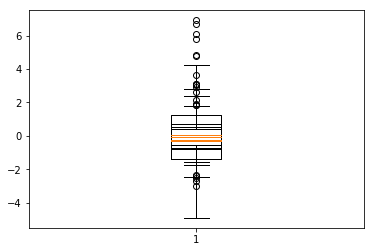

In [29]:
# outlier treatment for PC1
plt.boxplot(pca_df_2d.PC1)

# outlier treatment for PC2
plt.boxplot(pca_df_2d.PC2)

# outlier treatment for PC3
plt.boxplot(pca_df_2d.PC3)

# outlier treatment for PC4
plt.boxplot(pca_df_2d.PC4)



### As per Outlier analysis through IQR, there are 18 data points which are outliers . Hence, we move them to a different dataframe. 
### Only consider the data without outliers for K-means clustering

In [33]:
pca_df_2d_noutlier = pca_df_2d[~((pca_df_2d < (Q1 - 1.5 * IQR)) |(pca_df_2d > (Q3 + 1.5 * IQR))).any(axis=1)]
pca_df_2d_noutlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, Afghanistan to Zambia
Data columns (total 4 columns):
PC1    149 non-null float64
PC2    149 non-null float64
PC3    149 non-null float64
PC4    149 non-null float64
dtypes: float64(4)
memory usage: 5.8+ KB


## variance explained by each principal component


In [34]:
print(pca.explained_variance_ratio_) 

[0.4595174  0.17181626 0.13004259 0.11053162]


# 87% variance achieved

In [35]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print (var1)

[45.95 63.13 76.13 87.18]


# Let us plot the variance explained by each principal component. 

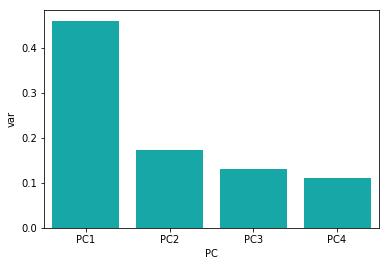

In [36]:
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1', 'PC2','PC3', 'PC4']})
sns.barplot(x='PC',y="var", 
           data=df, color="c");

## Plotting PC1 and PC2 based on Countries

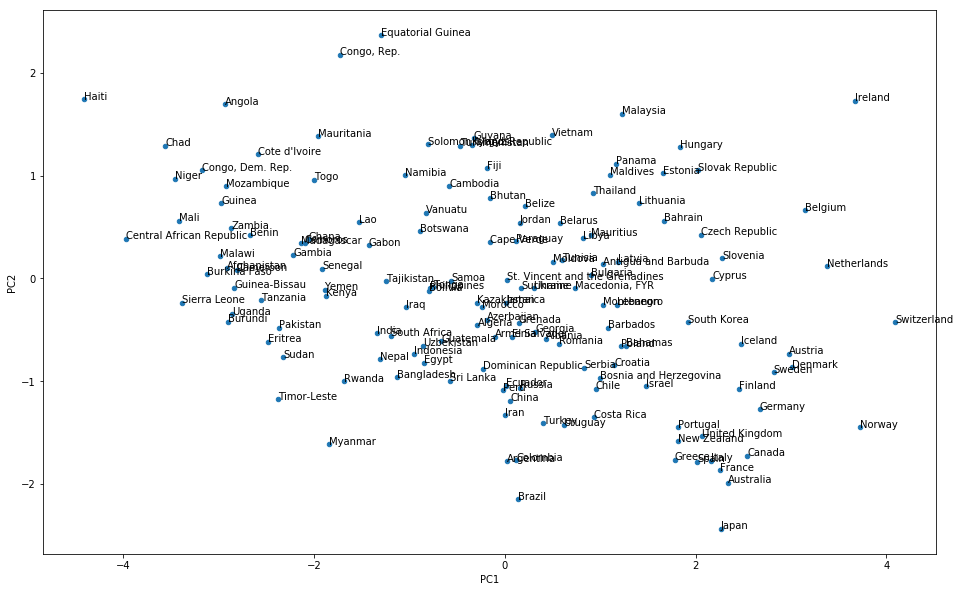

In [37]:
%matplotlib inline

ax = pca_df_2d_noutlier.plot(kind='scatter', x='PC1', y='PC2', figsize=(16,10))

for i, country in enumerate(pca_df_2d_noutlier.index):
    ax.annotate(country, (pca_df_2d_noutlier.iloc[i].PC1, pca_df_2d_noutlier.iloc[i].PC2))

In [38]:
#craeating correlation matrix for the principal components
corrmat = np.corrcoef(pca_df_2d_noutlier.transpose())

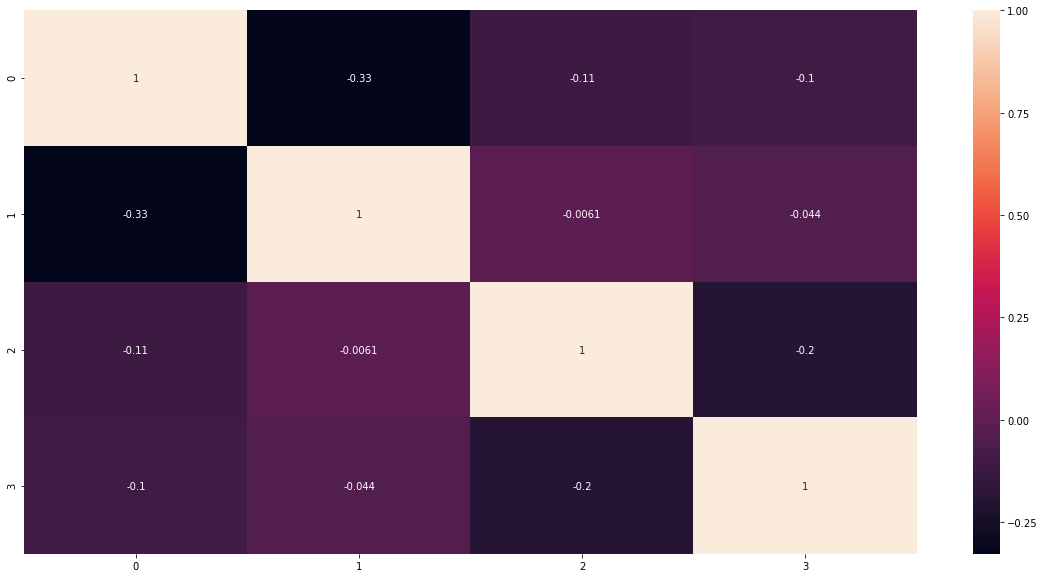

In [39]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

## Max and Min correlation after PCA which is indeed very close to 0
## max corr: 0.0 , min corr:  -0.32678048277261856

In [40]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0 , min corr:  -0.32678048277261856


## Different statistics before K-means

## Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [41]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [42]:
hopkins(pca_df_2d_noutlier)

0.7536543935622947

## Hopkins statistics is 0.76
## it means data has a high tendency to cluster

## Silhouette_score

For n_clusters=2, The Silhouette Coefficient is 0.3920772075961265
For n_clusters=3, The Silhouette Coefficient is 0.37829681633756984
For n_clusters=4, The Silhouette Coefficient is 0.3150226073522795
For n_clusters=5, The Silhouette Coefficient is 0.28748321087001993
For n_clusters=6, The Silhouette Coefficient is 0.27666540621494445
For n_clusters=7, The Silhouette Coefficient is 0.27549369872996793
For n_clusters=8, The Silhouette Coefficient is 0.28327378066219006
For n_clusters=9, The Silhouette Coefficient is 0.2922181145229547
For n_clusters=10, The Silhouette Coefficient is 0.2716209859579776
For n_clusters=11, The Silhouette Coefficient is 0.282558827990012
For n_clusters=12, The Silhouette Coefficient is 0.2553972456660434
For n_clusters=13, The Silhouette Coefficient is 0.24332797072688578
For n_clusters=14, The Silhouette Coefficient is 0.2556030165663792


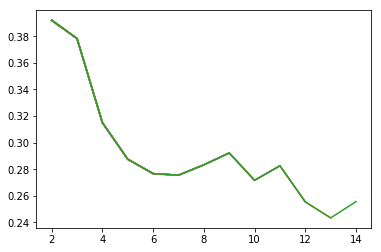

In [43]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(pca_df_2d_noutlier)
    label = kmeans.labels_
    sil_coeff = silhouette_score(pca_df_2d_noutlier, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(k, sil_coeff))
   
    sse_.append([k, silhouette_score(pca_df_2d_noutlier, kmeans.labels_)])
    plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

### SSD for Elbow Curve to find optimal K

In [44]:
  
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(pca_df_2d_noutlier)
    print(km.inertia_)
    Sum_of_squared_distances.append(km.inertia_)


850.0209064381256
479.15021037431524
317.64772375027746
261.7125630834427
228.67753082509273
203.38396368483762
182.56469686213788
162.2469761936927
142.57693919056305
134.9747717334663
127.61438139799564
118.16459511928862
112.71142253869449
107.04927643794082


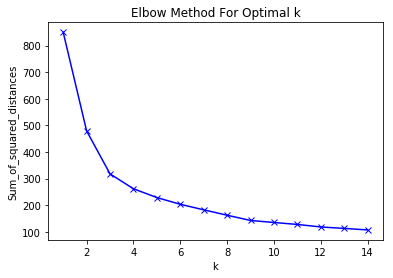

In [45]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Optimal cluster looks to be 

In [46]:
# Kmeans with K=4
kmeans = KMeans(n_clusters = 4, max_iter=100)
clusters=kmeans.fit(pca_df_2d_noutlier)
print(clusters)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [47]:
y_kmeans = kmeans.predict(pca_df_2d_noutlier)
print(y_kmeans)

[1 2 3 1 2 3 3 0 0 3 2 2 3 2 2 0 2 1 2 3 2 1 3 2 1 1 2 1 0 2 1 1 3 3 3 1 1
 1 2 1 2 2 2 0 3 3 3 2 1 1 2 2 0 0 1 1 2 0 1 0 2 3 1 1 2 1 2 0 3 3 3 3 0 0
 0 3 0 2 3 1 2 1 2 2 2 2 2 1 1 2 2 1 1 2 2 2 3 1 3 1 3 0 0 1 0 1 2 2 3 3 2
 0 2 3 1 2 1 2 1 2 0 2 1 2 0 3 2 1 2 0 0 3 1 2 1 1 3 2 3 2 1 2 0 3 3 2 2 1
 1]


In [48]:
labels = kmeans.predict(pca_df_2d_noutlier)
centroids = kmeans.cluster_centers_
labels1=kmeans.labels_
print ('labels',labels1)
print (centroids)

labels [1 2 3 1 2 3 3 0 0 3 2 2 3 2 2 0 2 1 2 3 2 1 3 2 1 1 2 1 0 2 1 1 3 3 3 1 1
 1 2 1 2 2 2 0 3 3 3 2 1 1 2 2 0 0 1 1 2 0 1 0 2 3 1 1 2 1 2 0 3 3 3 3 0 0
 0 3 0 2 3 1 2 1 2 2 2 2 2 1 1 2 2 1 1 2 2 2 3 1 3 1 3 0 0 1 0 1 2 2 3 3 2
 0 2 3 1 2 1 2 1 2 0 2 1 2 0 3 2 1 2 0 0 3 1 2 1 1 3 2 3 2 1 2 0 3 3 2 2 1
 1]
[[ 2.57601111 -1.0274813  -0.32907331  1.01227449]
 [-2.46833083  0.38684134 -0.08491951  0.63547169]
 [ 0.66881767  0.26447497 -0.336698   -0.77397846]
 [-0.40484085 -0.83561253  0.43249652 -0.73645176]]


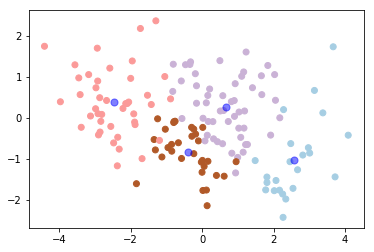

In [49]:
plt.scatter(pca_df_2d_noutlier.iloc[:,0], pca_df_2d_noutlier.iloc[:,1], c=y_kmeans, cmap=plt.cm.Paired) 
plt.scatter(centroids[:, 0], centroids[:, 1], c='blue', s=50, alpha=0.5);
plt.show() 

## Assign the clusters back to the data frame

In [50]:
pca_df_2d_noutlier['cluster'] = pd.Series(clusters.labels_, index=pca_df_2d_noutlier.index)
pca_df_2d_noutlier.head()

C:\Users\parida\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,PC1,PC2,PC3,PC4,cluster
country,,,,,
Afghanistan,-2.913025,0.095621,-0.718118,1.005255,1
Albania,0.429911,-0.588156,-0.333486,-1.161059,2
Algeria,-0.285225,-0.455174,1.221505,-0.868115,3
Angola,-2.932423,1.695555,1.525044,0.839625,1
Antigua and Barbuda,1.033576,0.136659,-0.225721,-0.847063,2


In [51]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


In [52]:
country_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Merge the data to main dataframe to perform visualization

In [53]:
final_df = pd.merge(country_data, pca_df_2d_noutlier, left_index=True, right_index=True)

In [54]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, Afghanistan to Zambia
Data columns (total 14 columns):
child_mort    149 non-null float64
exports       149 non-null float64
health        149 non-null float64
imports       149 non-null float64
income        149 non-null int64
inflation     149 non-null float64
life_expec    149 non-null float64
total_fer     149 non-null float64
gdpp          149 non-null int64
PC1           149 non-null float64
PC2           149 non-null float64
PC3           149 non-null float64
PC4           149 non-null float64
cluster       149 non-null int32
dtypes: float64(11), int32(1), int64(2)
memory usage: 16.9+ KB


In [55]:
final_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,cluster
country,,,,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.913025,0.095621,-0.718118,1.005255,1
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.429911,-0.588156,-0.333486,-1.161059,2
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.285225,-0.455174,1.221505,-0.868115,3
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-2.932423,1.695555,1.525044,0.839625,1
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.033576,0.136659,-0.225721,-0.847063,2


In [56]:
final_cluster_0=final_df.loc[(final_df['cluster'] == 0)] [['child_mort','inflation','gdpp','health']]
final_cluster_0.describe()


,child_mort,inflation,gdpp,health
count,23.000000,23.000000,23.000000,23.000000
mean,4.117391,1.238957,44330.434783,10.144348
std,0.864266,2.059617,15104.076355,1.142501
min,2.600000,-3.220000,22500.000000,7.630000
25%,3.500000,0.335000,34750.000000,9.445000
50%,4.200000,0.873000,44400.000000,9.640000
75%,4.500000,1.825000,49500.000000,11.150000
max,6.200000,5.950000,87800.000000,11.900000


In [57]:
final_cluster_0.gdpp.mean()

44330.434782608696

In [58]:
final_cluster_1=final_df.loc[(final_df['cluster'] == 1)] [['child_mort','inflation','income','gdpp','health']]
final_cluster_1.gdpp.mean()
final_cluster_1.inflation.min()

0.885

In [59]:
final_cluster_1.head()

,child_mort,inflation,income,gdpp,health
country,,,,,
Afghanistan,90.2,9.440,1610,553,7.58
Angola,119.0,22.400,5900,3530,2.85
Benin,111.0,0.885,1820,758,4.10
Botswana,52.5,8.920,13300,6350,8.30
Burkina Faso,116.0,6.810,1430,575,6.74


In [60]:
final_cluster_2=final_df.loc[(final_df['cluster'] == 2)] [['child_mort','inflation','gdpp','health']]
final_cluster_2.gdpp.mean()

8295.5

In [61]:
final_cluster_3=final_df.loc[(final_df['cluster'] == 3)] [['child_mort','inflation','gdpp','health']]
final_cluster_3.head()

,child_mort,inflation,gdpp,health
country,,,,
Algeria,27.3,16.10,4460,4.17
Argentina,14.5,20.90,10300,8.10
Armenia,18.1,7.77,3220,4.40
Azerbaijan,39.2,13.80,5840,5.88
Bangladesh,49.4,7.14,758,3.52


In [62]:
clusters_child_mor = 	pd.DataFrame(final_df.groupby(["cluster"]).child_mort.mean())
clusters_exports = 	pd.DataFrame(final_df.groupby(["cluster"]).exports.mean())
clusters_health = 	pd.DataFrame(final_df.groupby(["cluster"]).health.mean())
clusters_imports = 	pd.DataFrame(final_df.groupby(["cluster"]).exports.mean())
clusters_income = 	pd.DataFrame(final_df.groupby(["cluster"]).income.mean())
clusters_inflation = 	pd.DataFrame(final_df.groupby(["cluster"]).inflation.mean())
clusters_life_expec = 	pd.DataFrame(final_df.groupby(["cluster"]).life_expec.mean())
clusters_total_fertility = 	pd.DataFrame(final_df.groupby(["cluster"]).total_fer.mean())
clusters_gdpp = 	pd.DataFrame(final_df.groupby(["cluster"]).gdpp.mean())

In [63]:
print(clusters_child_mor)
print(clusters_exports)
print(clusters_health)
print(clusters_imports)
print(clusters_income)
print(clusters_inflation)
print(clusters_life_expec)
print(clusters_total_fertility)
print(clusters_gdpp)


         child_mort
cluster            
0          4.117391
1         94.061905
2         16.473077
3         28.871875
           exports
cluster           
0        42.986957
1        29.371667
2        50.007692
3        25.721531
            health
cluster           
0        10.144348
1         6.013810
2         6.762308
3         5.536875
           exports
cluster           
0        42.986957
1        29.371667
2        50.007692
3        25.721531
               income
cluster              
0        39365.217391
1         3872.214286
2        14159.230769
3        10323.125000
         inflation
cluster           
0         1.238957
1        10.313929
2         4.186635
3        10.360812
         life_expec
cluster            
0         80.926087
1         59.192857
2         73.538462
3         72.406250
         total_fer
cluster           
0         1.795217
1         5.067143
2         2.092308
3         2.523125
                 gdpp
cluster              
0        44330

In [64]:
final_cluster_df = pd.concat([pd.Series([0,1,2,3]),clusters_child_mor,clusters_exports,clusters_health,clusters_imports,clusters_income,clusters_inflation,clusters_life_expec,clusters_total_fertility,clusters_gdpp], axis=1)
final_cluster_df.columns = ["ClusterID", "Child_Mor","Exports","Health","import1","income","inflation","life_expectancy", "Fertility","gdpp"]
final_cluster_df.head()



,ClusterID,Child_Mor,Exports,Health,import1,income,inflation,life_expectancy,Fertility,gdpp
0,0,4.117391,42.986957,10.144348,42.986957,39365.217391,1.238957,80.926087,1.795217,44330.434783
1,1,94.061905,29.371667,6.013810,29.371667,3872.214286,10.313929,59.192857,5.067143,1917.500000
2,2,16.473077,50.007692,6.762308,50.007692,14159.230769,4.186635,73.538462,2.092308,8295.500000
3,3,28.871875,25.721531,5.536875,25.721531,10323.125000,10.360812,72.406250,2.523125,4987.062500


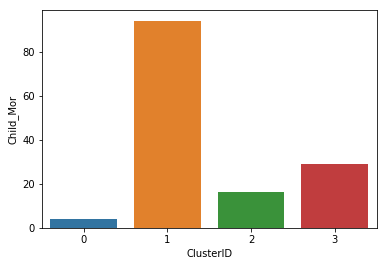

In [65]:
#plotting barplot for Child_Mor
sns.barplot(x=final_cluster_df.ClusterID, y=final_cluster_df.Child_Mor)

# Child mortality is high on cluster 1 and 3

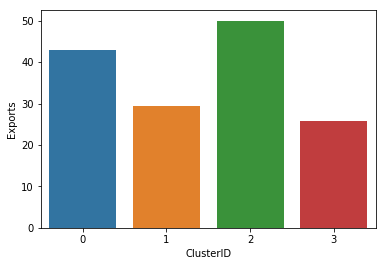

In [67]:
#plotting barplot for Exports
sns.barplot(x=final_cluster_df.ClusterID, y=final_cluster_df.Exports)

## Export is high on cluster 2,0 and 1

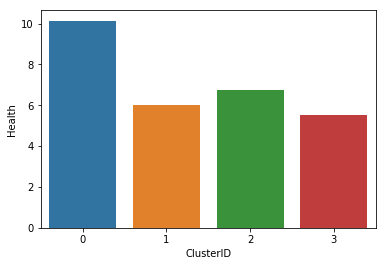

In [68]:
#plotting barplot for Health
sns.barplot(x=final_cluster_df.ClusterID, y=final_cluster_df.Health)

## Health Spent is high on cluster 0,2 

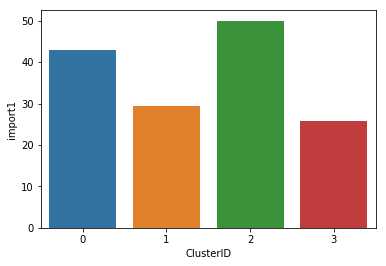

In [69]:
#plotting barplot for Import
sns.barplot(x=final_cluster_df.ClusterID, y=final_cluster_df.import1)

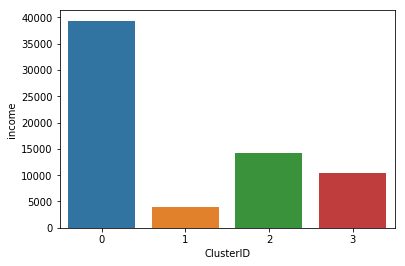

In [70]:
#plotting barplot for Child_Mor
sns.barplot(x=final_cluster_df.ClusterID, y=final_cluster_df.income)

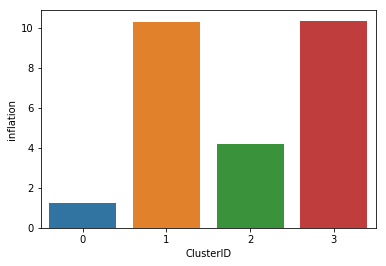

In [72]:
#plotting barplot for inflation
sns.barplot(x=final_cluster_df.ClusterID, y=final_cluster_df.inflation)

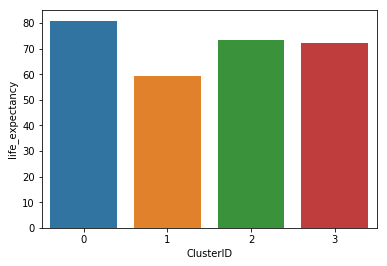

In [73]:
#plotting barplot for life_expectancy
sns.barplot(x=final_cluster_df.ClusterID, y=final_cluster_df.life_expectancy)

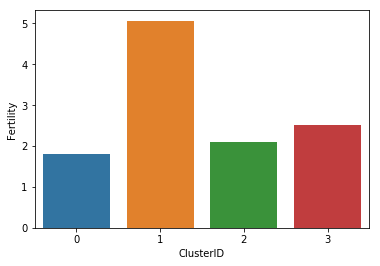

In [74]:
#plotting barplot for Child_Mor
sns.barplot(x=final_cluster_df.ClusterID, y=final_cluster_df.Fertility)

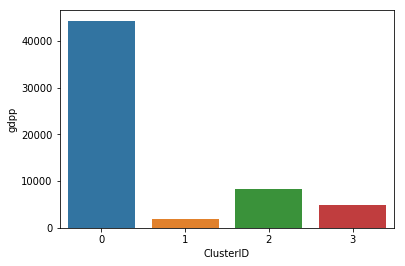

In [75]:
#plotting barplot for Child_Mor
sns.barplot(x=final_cluster_df.ClusterID, y=final_cluster_df.gdpp)

## Cluster 0 has highest GDP,life_expectancy,income,export,import,health and  low in inflation ,child mortality,total_fertility ---> these are the developed countries

## Cluster 2 has higher GDP,life_expectancy,income,export,import,health spending and lowest inflation,child mortality, total_fertility---> 

## Cluster 3 has lower GDP,imports ,export, income,export,import and  higher inflation,child mortality, total_fertility---> this cluster needs help compared to cluster 3 and 0

## Cluster 1 has lowest GDP,income,health,life_expectancy and highest inflation,child mortality,total_fertility---> this cluster is need for help





## Check on Outlier dataframe

In [76]:

final_outlier_df = pd.merge(country_data, pca_df_2d_outlier, left_index=True, right_index=True)
final_outlier_df.head(18)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4
country,,,,,,,,,,,,,
Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,2.460086,0.016454,3.019840,0.776841
Kiribati,62.7,13.3,11.30,79.9,1730,1.520,60.7,3.84,1490,-1.239217,0.369138,-2.368274,0.592231
Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500,2.465659,0.088050,2.652268,0.708884
Lesotho,99.7,39.4,11.10,101.0,2380,4.150,46.5,3.30,1170,-1.803151,2.037851,-2.496885,1.072199
Liberia,89.3,19.1,11.80,92.6,700,5.470,60.8,5.02,327,-1.773580,1.053399,-2.390440,1.179569
Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,6.917755,4.849844,1.001837,3.129643
Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,3.679543,4.765486,-1.021313,-0.501107
"Micronesia, Fed. Sts.",40.0,23.5,14.20,81.0,3340,3.800,65.4,3.46,2860,-0.380929,0.101774,-2.714085,0.771974
Mongolia,26.1,46.7,5.44,56.7,7710,39.200,66.2,2.64,2650,-0.944976,0.529800,1.854419,-0.394166


In [78]:
final_outlier_df.loc[((final_outlier_df['child_mort'] <= 8.6)), 'cluster'] = 0
final_outlier_df.loc[((final_outlier_df['child_mort'] >= 9)  & (final_outlier_df['child_mort'] <=45)), 'cluster'] = 2
final_outlier_df.loc[((final_outlier_df['child_mort'] >= 46) & (final_outlier_df['child_mort'] <= 65)), 'cluster'] = 3
final_outlier_df.loc[( (final_outlier_df['child_mort'] >= 66)), 'cluster'] = 1


In [79]:
final_outlier_df.head(18)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,cluster
country,,,,,,,,,,,,,,
Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,2.460086,0.016454,3.019840,0.776841,2.0
Kiribati,62.7,13.3,11.30,79.9,1730,1.520,60.7,3.84,1490,-1.239217,0.369138,-2.368274,0.592231,3.0
Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500,2.465659,0.088050,2.652268,0.708884,2.0
Lesotho,99.7,39.4,11.10,101.0,2380,4.150,46.5,3.30,1170,-1.803151,2.037851,-2.496885,1.072199,1.0
Liberia,89.3,19.1,11.80,92.6,700,5.470,60.8,5.02,327,-1.773580,1.053399,-2.390440,1.179569,1.0
Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,6.917755,4.849844,1.001837,3.129643,0.0
Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,3.679543,4.765486,-1.021313,-0.501107,0.0
"Micronesia, Fed. Sts.",40.0,23.5,14.20,81.0,3340,3.800,65.4,3.46,2860,-0.380929,0.101774,-2.714085,0.771974,2.0
Mongolia,26.1,46.7,5.44,56.7,7710,39.200,66.2,2.64,2650,-0.944976,0.529800,1.854419,-0.394166,2.0


In [80]:
final_outlier_df.head(18)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,cluster
country,,,,,,,,,,,,,,
Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,2.460086,0.016454,3.019840,0.776841,2.0
Kiribati,62.7,13.3,11.30,79.9,1730,1.520,60.7,3.84,1490,-1.239217,0.369138,-2.368274,0.592231,3.0
Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500,2.465659,0.088050,2.652268,0.708884,2.0
Lesotho,99.7,39.4,11.10,101.0,2380,4.150,46.5,3.30,1170,-1.803151,2.037851,-2.496885,1.072199,1.0
Liberia,89.3,19.1,11.80,92.6,700,5.470,60.8,5.02,327,-1.773580,1.053399,-2.390440,1.179569,1.0
Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,6.917755,4.849844,1.001837,3.129643,0.0
Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,3.679543,4.765486,-1.021313,-0.501107,0.0
"Micronesia, Fed. Sts.",40.0,23.5,14.20,81.0,3340,3.800,65.4,3.46,2860,-0.380929,0.101774,-2.714085,0.771974,2.0
Mongolia,26.1,46.7,5.44,56.7,7710,39.200,66.2,2.64,2650,-0.944976,0.529800,1.854419,-0.394166,2.0


In [81]:
final_outlier_df["cluster"]=final_outlier_df["cluster"].astype(int)

In [82]:
final_outlier_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, Brunei to Venezuela
Data columns (total 14 columns):
child_mort    18 non-null float64
exports       18 non-null float64
health        18 non-null float64
imports       18 non-null float64
income        18 non-null int64
inflation     18 non-null float64
life_expec    18 non-null float64
total_fer     18 non-null float64
gdpp          18 non-null int64
PC1           18 non-null float64
PC2           18 non-null float64
PC3           18 non-null float64
PC4           18 non-null float64
cluster       18 non-null int32
dtypes: float64(11), int32(1), int64(2)
memory usage: 2.0+ KB


## Appended non-outlier and outlier frame

In [83]:
result = final_df.append(final_outlier_df,sort=True)

In [84]:
result.head()

,PC1,PC2,PC3,PC4,child_mort,cluster,exports,gdpp,health,imports,income,inflation,life_expec,total_fer
country,,,,,,,,,,,,,,
Afghanistan,-2.913025,0.095621,-0.718118,1.005255,90.2,1,10.0,553,7.58,44.9,1610,9.44,56.2,5.82
Albania,0.429911,-0.588156,-0.333486,-1.161059,16.6,2,28.0,4090,6.55,48.6,9930,4.49,76.3,1.65
Algeria,-0.285225,-0.455174,1.221505,-0.868115,27.3,3,38.4,4460,4.17,31.4,12900,16.10,76.5,2.89
Angola,-2.932423,1.695555,1.525044,0.839625,119.0,1,62.3,3530,2.85,42.9,5900,22.40,60.1,6.16
Antigua and Barbuda,1.033576,0.136659,-0.225721,-0.847063,10.3,2,45.5,12200,6.03,58.9,19100,1.44,76.8,2.13


In [85]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Venezuela
Data columns (total 14 columns):
PC1           167 non-null float64
PC2           167 non-null float64
PC3           167 non-null float64
PC4           167 non-null float64
child_mort    167 non-null float64
cluster       167 non-null int32
exports       167 non-null float64
gdpp          167 non-null int64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
dtypes: float64(11), int32(1), int64(2)
memory usage: 18.9+ KB


In [86]:
result.to_csv("K_means_Cluster.csv")

In [87]:
clusters_child_mor = 	pd.DataFrame(result.groupby(["cluster"]).child_mort.mean())
clusters_exports = 	pd.DataFrame(result.groupby(["cluster"]).exports.mean())
clusters_health = 	pd.DataFrame(result.groupby(["cluster"]).health.mean())
clusters_imports = 	pd.DataFrame(result.groupby(["cluster"]).exports.mean())
clusters_income = 	pd.DataFrame(result.groupby(["cluster"]).income.mean())
clusters_inflation = 	pd.DataFrame(result.groupby(["cluster"]).inflation.mean())
clusters_life_expec = 	pd.DataFrame(result.groupby(["cluster"]).life_expec.mean())
clusters_total_fertility = 	pd.DataFrame(result.groupby(["cluster"]).total_fer.mean())
clusters_gdpp = 	pd.DataFrame(result.groupby(["cluster"]).gdpp.mean())

## Visualizing combined data frame and the result looks same

In [88]:
final_cluster = pd.concat([pd.Series([0,1,2,3]),clusters_child_mor,clusters_exports,clusters_health,clusters_imports,clusters_income,clusters_inflation,clusters_life_expec,clusters_total_fertility,clusters_gdpp], axis=1)
final_cluster.columns = ["ClusterID", "Child_Mor","Exports","Health","import1","income","inflation","life_expectancy", "Fertility","gdpp"]
final_cluster.head()

,ClusterID,Child_Mor,Exports,Health,import1,income,inflation,life_expectancy,Fertility,gdpp
0,0,4.392857,57.385714,9.830714,57.385714,43017.857143,1.772143,80.742857,1.758214,45560.714286
1,1,94.880000,29.275778,6.234444,29.275778,3796.955556,12.151222,58.975556,5.044000,1874.711111
2,2,16.588525,50.895082,6.457869,50.895082,18946.393443,6.066803,73.613115,2.156066,10555.344262
3,3,29.896970,25.345121,5.711515,25.345121,10062.727273,10.092909,72.051515,2.563030,4881.090909


## Final plotting based on Total data

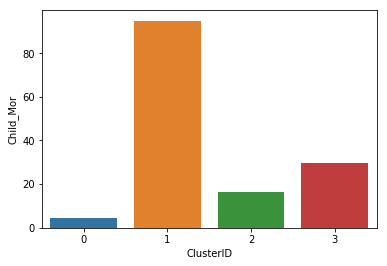

In [89]:
#plotting barplot for Child_Mor
sns.barplot(x=final_cluster.ClusterID, y=final_cluster.Child_Mor)

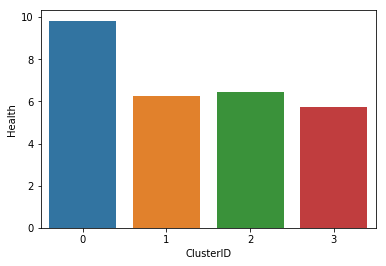

In [90]:
#plotting barplot for Health
sns.barplot(x=final_cluster.ClusterID, y=final_cluster.Health)

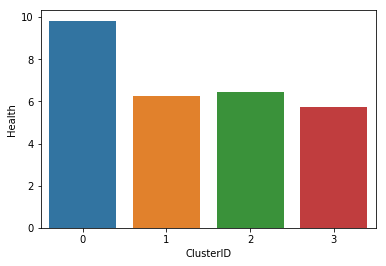

In [91]:
#plotting barplot for income
sns.barplot(x=final_cluster.ClusterID, y=final_cluster.income)

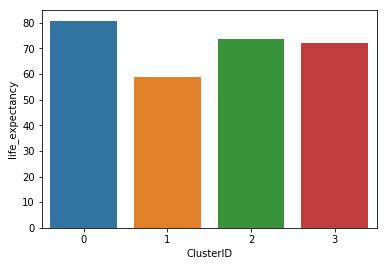

In [92]:
#plotting barplot for life_expectancy
sns.barplot(x=final_cluster.ClusterID, y=final_cluster.life_expectancy)

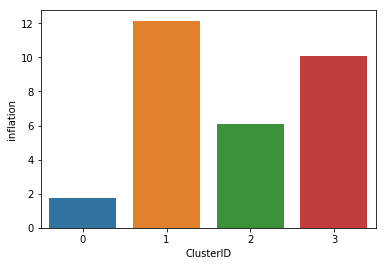

In [93]:
#plotting barplot for Inflation
sns.barplot(x=final_cluster.ClusterID, y=final_cluster.inflation)

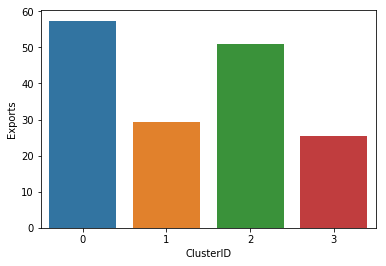

In [94]:
#plotting barplot for export
sns.barplot(x=final_cluster.ClusterID, y=final_cluster.Exports)

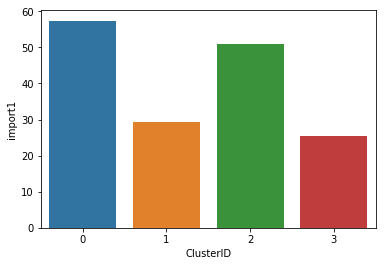

In [95]:
#plotting barplot for import
sns.barplot(x=final_cluster.ClusterID, y=final_cluster.import1)

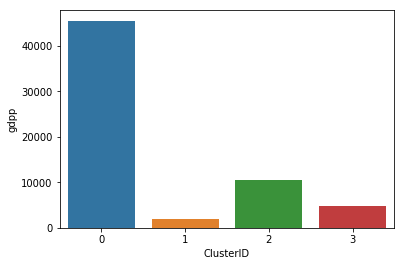

In [96]:
#plotting barplot for gdpp
sns.barplot(x=final_cluster.ClusterID, y=final_cluster.gdpp)

## Hierarchical Clustering

### Single Hierarchical Clustering method

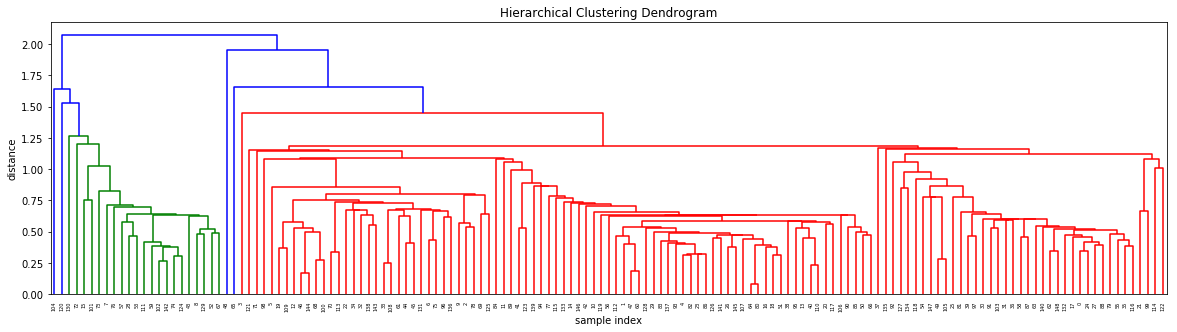

In [97]:
mergings = linkage(pca_df_2d_noutlier, method = "single", metric='euclidean')
plt.figure(figsize=(20,5))
dendrogram(mergings)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.show()

## Complete Hierarchical Clustering method

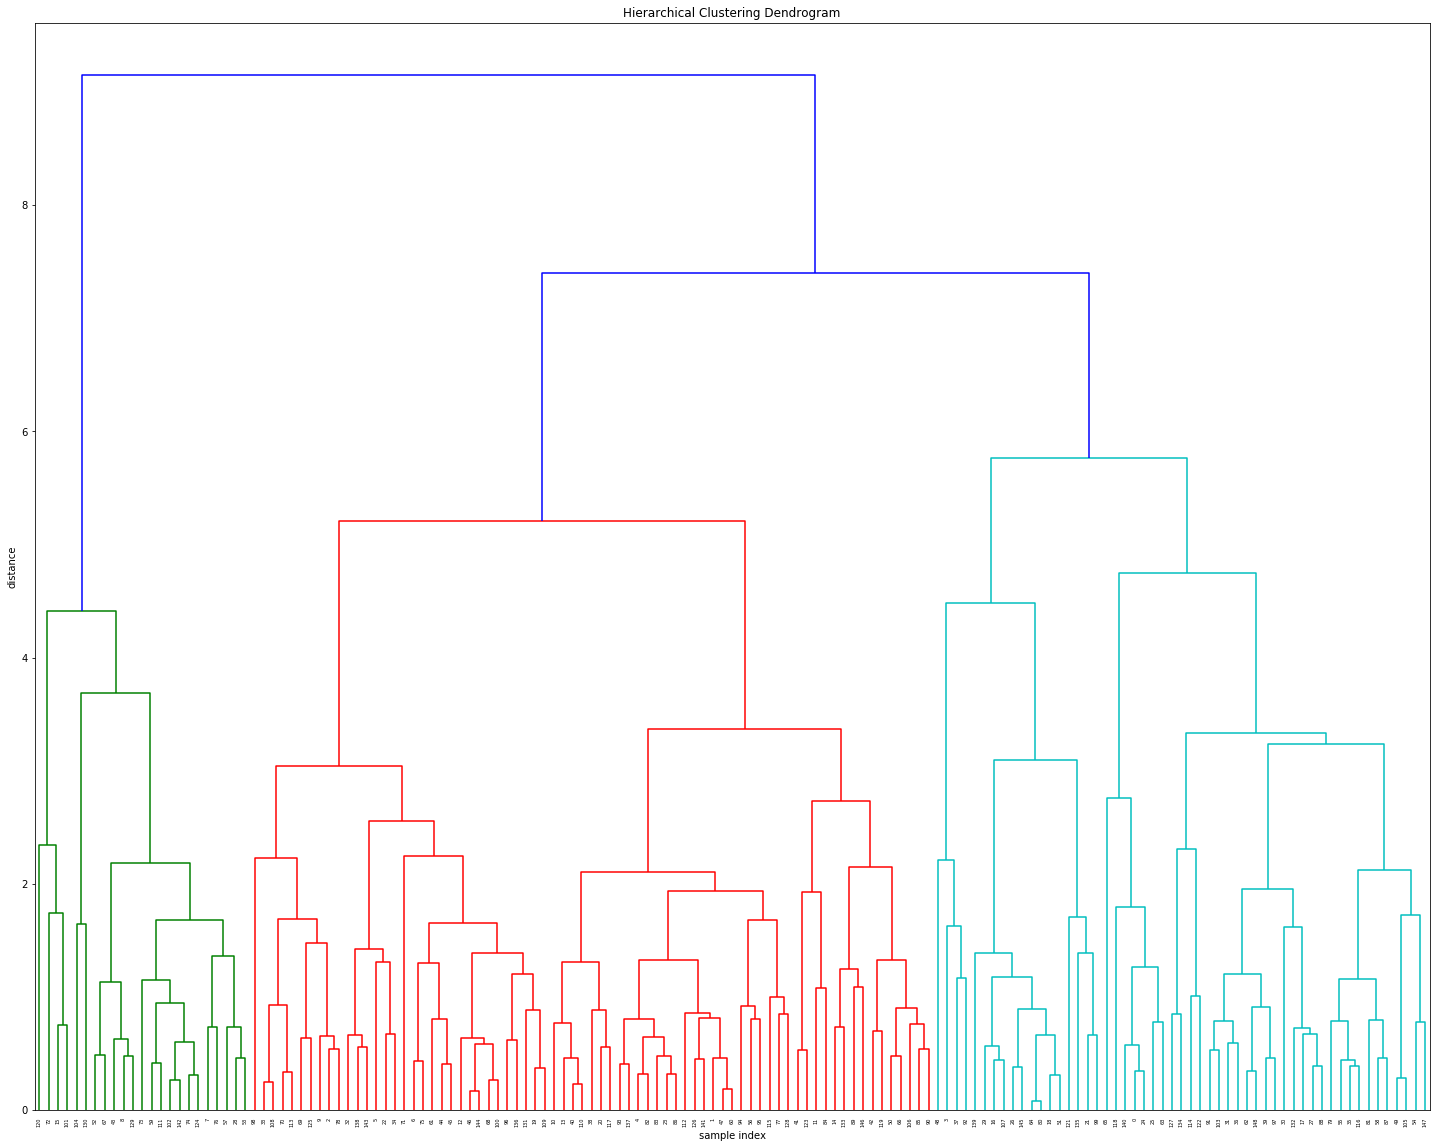

In [98]:
mergings = linkage(pca_df_2d_noutlier, method = "complete", metric='euclidean')
plt.figure(figsize=(25,20))
dendrogram(mergings)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.show()

## AgglomerativeClustering

In [99]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(pca_df_2d_noutlier)  

array([0, 1, 3, 0, 1, 3, 3, 2, 2, 3, 1, 1, 3, 1, 1, 2, 1, 0, 1, 3, 1, 0,
       3, 1, 0, 0, 1, 0, 2, 1, 0, 0, 3, 3, 3, 0, 0, 0, 1, 0, 1, 1, 1, 2,
       3, 3, 3, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 3, 0, 0, 1, 0,
       1, 2, 3, 3, 3, 3, 2, 2, 2, 3, 2, 1, 3, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 3, 0, 3, 0, 3, 2, 2, 0, 2, 0, 1, 1, 3, 3,
       1, 2, 1, 3, 0, 1, 0, 1, 0, 1, 2, 0, 0, 1, 2, 3, 1, 0, 1, 2, 2, 3,
       0, 1, 0, 0, 3, 1, 3, 1, 0, 1, 2, 3, 3, 1, 1, 0, 0], dtype=int64)

In [100]:
pca_df_2d_noutlier['cluster_new'] = pd.Series(cluster.labels_, index=pca_df_2d_noutlier.index)
pca_df_2d_noutlier.head()

C:\Users\parida\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,PC1,PC2,PC3,PC4,cluster,cluster_new
country,,,,,,
Afghanistan,-2.913025,0.095621,-0.718118,1.005255,1,0
Albania,0.429911,-0.588156,-0.333486,-1.161059,2,1
Algeria,-0.285225,-0.455174,1.221505,-0.868115,3,3
Angola,-2.932423,1.695555,1.525044,0.839625,1,0
Antigua and Barbuda,1.033576,0.136659,-0.225721,-0.847063,2,1


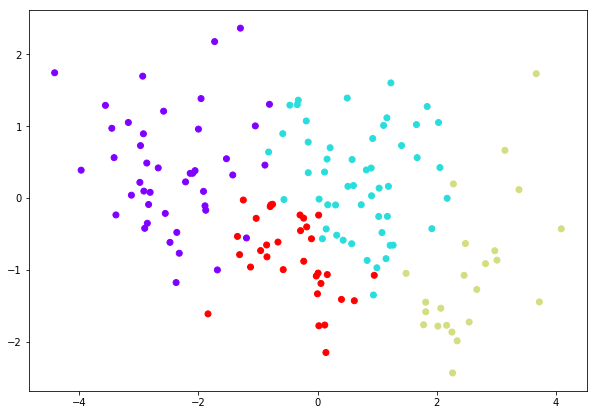

In [101]:
plt.figure(figsize=(10, 7))  
plt.scatter(pca_df_2d_noutlier.iloc[:,0], pca_df_2d_noutlier.iloc[:,1], c=cluster.labels_, cmap='rainbow')  

In [102]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2)
memory usage: 18.0+ KB


In [103]:
pca_df_2d_noutlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, Afghanistan to Zambia
Data columns (total 6 columns):
PC1            149 non-null float64
PC2            149 non-null float64
PC3            149 non-null float64
PC4            149 non-null float64
cluster        149 non-null int32
cluster_new    149 non-null int64
dtypes: float64(4), int32(1), int64(1)
memory usage: 12.6+ KB


In [104]:
final_noutlier_hierar_df = pd.merge(country_data, pca_df_2d_noutlier, left_index=True, right_index=True)
final_noutlier_hierar_df.head(18)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,cluster,cluster_new
country,,,,,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,-2.913025,0.095621,-0.718118,1.005255,1,0
Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0.429911,-0.588156,-0.333486,-1.161059,2,1
Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,-0.285225,-0.455174,1.221505,-0.868115,3,3
Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,-2.932423,1.695555,1.525044,0.839625,1,0
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,1.033576,0.136659,-0.225721,-0.847063,2,1
Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0.022407,-1.779187,0.869997,-0.036967,3,3
Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,-0.101584,-0.568252,0.242092,-1.466266,3,3
Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2.342165,-1.988459,0.190344,1.105038,0,2
Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2.973764,-0.734689,-0.519766,1.205442,0,2


In [105]:
final_noutlier_hierar_df_0=final_noutlier_hierar_df.loc[(final_noutlier_hierar_df['cluster_new'] == 0)] [['child_mort','inflation','gdpp','health']]
final_noutlier_hierar_df_0.head()

,child_mort,inflation,gdpp,health
country,,,,
Afghanistan,90.2,9.440,553,7.58
Angola,119.0,22.400,3530,2.85
Benin,111.0,0.885,758,4.10
Botswana,52.5,8.920,6350,8.30
Burkina Faso,116.0,6.810,575,6.74


In [106]:
final_noutlier_hierar_df_1=final_noutlier_hierar_df.loc[(final_noutlier_hierar_df['cluster_new'] == 1)] [['child_mort','inflation','gdpp','health']]
final_noutlier_hierar_df_1.head()

,child_mort,inflation,gdpp,health
country,,,,
Albania,16.6,4.490,4090,6.55
Antigua and Barbuda,10.3,1.440,12200,6.03
Bahamas,13.8,-0.393,28000,7.89
Bahrain,8.6,7.440,20700,4.97
Barbados,14.2,0.321,16000,7.97


In [107]:
final_noutlier_hierar_df_2=final_noutlier_hierar_df.loc[(final_noutlier_hierar_df['cluster_new'] == 2)] [['child_mort','inflation','gdpp','health']]
final_noutlier_hierar_df_2.head()

,child_mort,inflation,gdpp,health
country,,,,
Australia,4.8,1.160,51900,8.73
Austria,4.3,0.873,46900,11.00
Belgium,4.5,1.880,44400,10.70
Canada,5.6,2.870,47400,11.30
Denmark,4.1,3.220,58000,11.40


In [108]:
final_noutlier_hierar_df_3=final_noutlier_hierar_df.loc[(final_noutlier_hierar_df['cluster_new'] == 3)] [['child_mort','inflation','gdpp','health']]
final_noutlier_hierar_df_3.head()

,child_mort,inflation,gdpp,health
country,,,,
Algeria,27.3,16.10,4460,4.17
Argentina,14.5,20.90,10300,8.10
Armenia,18.1,7.77,3220,4.40
Azerbaijan,39.2,13.80,5840,5.88
Bangladesh,49.4,7.14,758,3.52


In [109]:
clusters_child_mor = 	pd.DataFrame(final_noutlier_hierar_df.groupby(["cluster_new"]).child_mort.mean())
clusters_exports = 	pd.DataFrame(final_noutlier_hierar_df.groupby(["cluster_new"]).exports.mean())
clusters_health = 	pd.DataFrame(final_noutlier_hierar_df.groupby(["cluster_new"]).health.mean())
clusters_imports = 	pd.DataFrame(final_noutlier_hierar_df.groupby(["cluster_new"]).exports.mean())
clusters_income = 	pd.DataFrame(final_noutlier_hierar_df.groupby(["cluster_new"]).income.mean())
clusters_inflation = 	pd.DataFrame(final_noutlier_hierar_df.groupby(["cluster_new"]).inflation.mean())
clusters_life_expec = 	pd.DataFrame(final_noutlier_hierar_df.groupby(["cluster_new"]).life_expec.mean())
clusters_total_fertility = 	pd.DataFrame(final_noutlier_hierar_df.groupby(["cluster_new"]).total_fer.mean())
clusters_gdpp = 	pd.DataFrame(final_noutlier_hierar_df.groupby(["cluster_new"]).gdpp.mean())

In [110]:
final_cluster_hi_df = pd.concat([pd.Series([0,1,2,3]),clusters_child_mor,clusters_exports,clusters_health,clusters_imports,clusters_income,clusters_inflation,clusters_life_expec,clusters_total_fertility,clusters_gdpp], axis=1)
final_cluster_hi_df.columns = ["ClusterID", "Child_Mor","Exports","Health","import1","income","inflation","life_expectancy", "Fertility","gdpp"]
final_cluster_hi_df.head()



,ClusterID,Child_Mor,Exports,Health,import1,income,inflation,life_expectancy,Fertility,gdpp
0,0,92.527907,29.835116,6.072791,29.835116,3823.558140,10.232442,59.251163,5.047907,1902.906977
1,1,16.245098,50.021569,6.727255,50.021569,14401.960784,4.135196,73.770588,2.050196,8432.862745
2,2,4.117391,42.986957,10.144348,42.986957,39365.217391,1.238957,80.926087,1.795217,44330.434783
3,3,28.871875,25.721531,5.536875,25.721531,10323.125000,10.360812,72.406250,2.523125,4987.062500


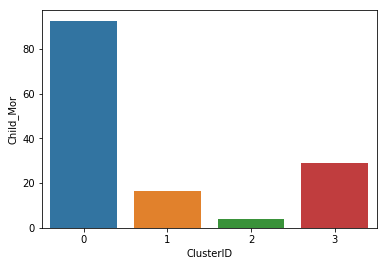

In [111]:
#plotting barplot for Child_Mor
sns.barplot(x=final_cluster_hi_df.ClusterID, y=final_cluster_hi_df.Child_Mor)

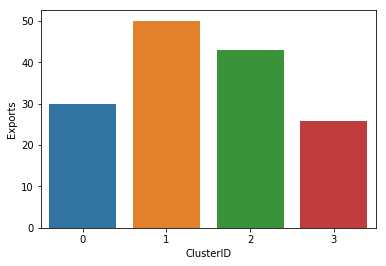

In [112]:
#plotting barplot for Child_Mor
sns.barplot(x=final_cluster_hi_df.ClusterID, y=final_cluster_hi_df.Exports)

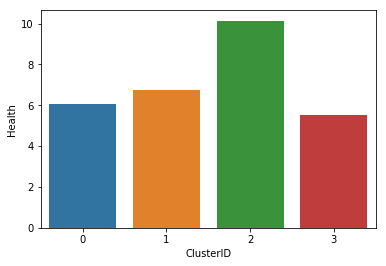

In [113]:
#plotting barplot for Child_Mor
sns.barplot(x=final_cluster_hi_df.ClusterID, y=final_cluster_hi_df.Health)

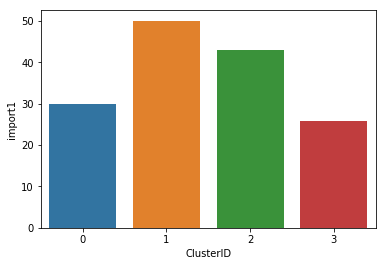

In [114]:
#plotting barplot for Child_Mor
sns.barplot(x=final_cluster_hi_df.ClusterID, y=final_cluster_hi_df.import1)

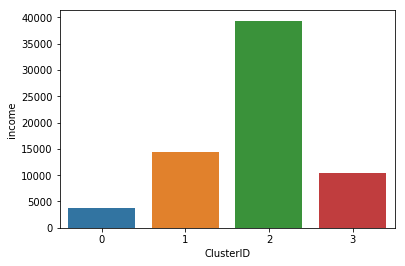

In [115]:
#plotting barplot for Child_Mor
sns.barplot(x=final_cluster_hi_df.ClusterID, y=final_cluster_hi_df.income)

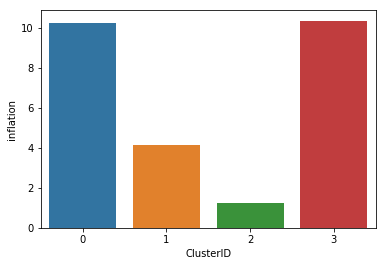

In [116]:
#plotting barplot for Child_Mor
sns.barplot(x=final_cluster_hi_df.ClusterID, y=final_cluster_hi_df.inflation)

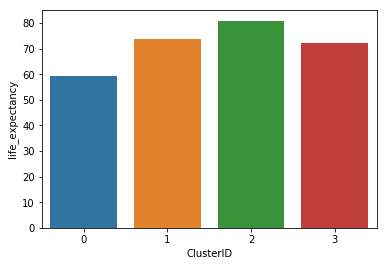

In [117]:
#plotting barplot for Child_Mor
sns.barplot(x=final_cluster_hi_df.ClusterID, y=final_cluster_hi_df.life_expectancy)

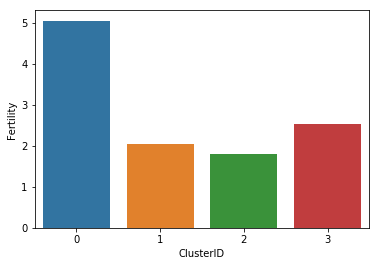

In [118]:
#plotting barplot for Child_Mor
sns.barplot(x=final_cluster_hi_df.ClusterID, y=final_cluster_hi_df.Fertility)

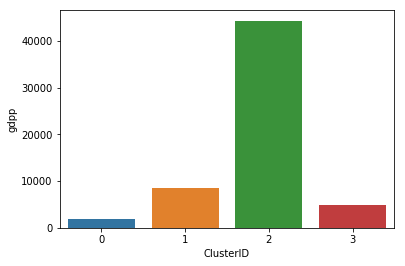

In [119]:
#plotting barplot for gdpp
sns.barplot(x=final_cluster_hi_df.ClusterID, y=final_cluster_hi_df.gdpp)

In [120]:
final_outlier_hierar_df = pd.merge(country_data, pca_df_2d_outlier, left_index=True, right_index=True)
final_outlier_hierar_df.head(18)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4
country,,,,,,,,,,,,,
Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,2.460086,0.016454,3.019840,0.776841
Kiribati,62.7,13.3,11.30,79.9,1730,1.520,60.7,3.84,1490,-1.239217,0.369138,-2.368274,0.592231
Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500,2.465659,0.088050,2.652268,0.708884
Lesotho,99.7,39.4,11.10,101.0,2380,4.150,46.5,3.30,1170,-1.803151,2.037851,-2.496885,1.072199
Liberia,89.3,19.1,11.80,92.6,700,5.470,60.8,5.02,327,-1.773580,1.053399,-2.390440,1.179569
Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,6.917755,4.849844,1.001837,3.129643
Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,3.679543,4.765486,-1.021313,-0.501107
"Micronesia, Fed. Sts.",40.0,23.5,14.20,81.0,3340,3.800,65.4,3.46,2860,-0.380929,0.101774,-2.714085,0.771974
Mongolia,26.1,46.7,5.44,56.7,7710,39.200,66.2,2.64,2650,-0.944976,0.529800,1.854419,-0.394166


In [121]:
final_outlier_hierar_df.loc[((final_outlier_hierar_df['child_mort'] <= 8.6)), 'cluster_new'] = 2
final_outlier_hierar_df.loc[((final_outlier_hierar_df['child_mort'] >= 9)  & (final_outlier_hierar_df['child_mort'] <=45)), 'cluster_new'] = 1
final_outlier_hierar_df.loc[((final_outlier_hierar_df['child_mort'] >= 46) & (final_outlier_hierar_df['child_mort'] <= 65)), 'cluster_new'] = 3
final_outlier_hierar_df.loc[( (final_outlier_hierar_df['child_mort'] >= 66)), 'cluster_new'] = 0


In [122]:
final_outlier_hierar_df.head(18)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,cluster_new
country,,,,,,,,,,,,,,
Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,2.460086,0.016454,3.019840,0.776841,1.0
Kiribati,62.7,13.3,11.30,79.9,1730,1.520,60.7,3.84,1490,-1.239217,0.369138,-2.368274,0.592231,3.0
Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500,2.465659,0.088050,2.652268,0.708884,1.0
Lesotho,99.7,39.4,11.10,101.0,2380,4.150,46.5,3.30,1170,-1.803151,2.037851,-2.496885,1.072199,0.0
Liberia,89.3,19.1,11.80,92.6,700,5.470,60.8,5.02,327,-1.773580,1.053399,-2.390440,1.179569,0.0
Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,6.917755,4.849844,1.001837,3.129643,2.0
Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,3.679543,4.765486,-1.021313,-0.501107,2.0
"Micronesia, Fed. Sts.",40.0,23.5,14.20,81.0,3340,3.800,65.4,3.46,2860,-0.380929,0.101774,-2.714085,0.771974,1.0
Mongolia,26.1,46.7,5.44,56.7,7710,39.200,66.2,2.64,2650,-0.944976,0.529800,1.854419,-0.394166,1.0


In [123]:
final_outlier_hierar_df["cluster_new"]=final_outlier_hierar_df["cluster_new"].astype(int)

In [124]:
final_outlier_hierar_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, Brunei to Venezuela
Data columns (total 14 columns):
child_mort     18 non-null float64
exports        18 non-null float64
health         18 non-null float64
imports        18 non-null float64
income         18 non-null int64
inflation      18 non-null float64
life_expec     18 non-null float64
total_fer      18 non-null float64
gdpp           18 non-null int64
PC1            18 non-null float64
PC2            18 non-null float64
PC3            18 non-null float64
PC4            18 non-null float64
cluster_new    18 non-null int32
dtypes: float64(11), int32(1), int64(2)
memory usage: 2.0+ KB


In [125]:
final_outlier_hierar_df.head(18)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,cluster_new
country,,,,,,,,,,,,,,
Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,2.460086,0.016454,3.019840,0.776841,1
Kiribati,62.7,13.3,11.30,79.9,1730,1.520,60.7,3.84,1490,-1.239217,0.369138,-2.368274,0.592231,3
Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500,2.465659,0.088050,2.652268,0.708884,1
Lesotho,99.7,39.4,11.10,101.0,2380,4.150,46.5,3.30,1170,-1.803151,2.037851,-2.496885,1.072199,0
Liberia,89.3,19.1,11.80,92.6,700,5.470,60.8,5.02,327,-1.773580,1.053399,-2.390440,1.179569,0
Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,6.917755,4.849844,1.001837,3.129643,2
Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,3.679543,4.765486,-1.021313,-0.501107,2
"Micronesia, Fed. Sts.",40.0,23.5,14.20,81.0,3340,3.800,65.4,3.46,2860,-0.380929,0.101774,-2.714085,0.771974,1
Mongolia,26.1,46.7,5.44,56.7,7710,39.200,66.2,2.64,2650,-0.944976,0.529800,1.854419,-0.394166,1


## Appended non -outlier and outlier dataframes and visualization

In [126]:
result_hierarchy = final_noutlier_hierar_df.append(final_outlier_hierar_df,sort=True)

In [127]:
result_hierarchy.head()

,PC1,PC2,PC3,PC4,child_mort,cluster,cluster_new,exports,gdpp,health,imports,income,inflation,life_expec,total_fer
country,,,,,,,,,,,,,,,
Afghanistan,-2.913025,0.095621,-0.718118,1.005255,90.2,1.0,0,10.0,553,7.58,44.9,1610,9.44,56.2,5.82
Albania,0.429911,-0.588156,-0.333486,-1.161059,16.6,2.0,1,28.0,4090,6.55,48.6,9930,4.49,76.3,1.65
Algeria,-0.285225,-0.455174,1.221505,-0.868115,27.3,3.0,3,38.4,4460,4.17,31.4,12900,16.10,76.5,2.89
Angola,-2.932423,1.695555,1.525044,0.839625,119.0,1.0,0,62.3,3530,2.85,42.9,5900,22.40,60.1,6.16
Antigua and Barbuda,1.033576,0.136659,-0.225721,-0.847063,10.3,2.0,1,45.5,12200,6.03,58.9,19100,1.44,76.8,2.13


In [128]:
result_hierarchy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Venezuela
Data columns (total 15 columns):
PC1            167 non-null float64
PC2            167 non-null float64
PC3            167 non-null float64
PC4            167 non-null float64
child_mort     167 non-null float64
cluster        149 non-null float64
cluster_new    167 non-null int64
exports        167 non-null float64
gdpp           167 non-null int64
health         167 non-null float64
imports        167 non-null float64
income         167 non-null int64
inflation      167 non-null float64
life_expec     167 non-null float64
total_fer      167 non-null float64
dtypes: float64(12), int64(3)
memory usage: 20.9+ KB


In [129]:
result_hierarchy.to_csv('Hierarchical_clustering.csv')

In [130]:
clusters_child_mor = 	pd.DataFrame(result_hierarchy.groupby(["cluster_new"]).child_mort.mean())
clusters_exports = 	pd.DataFrame(result_hierarchy.groupby(["cluster_new"]).exports.mean())
clusters_health = 	pd.DataFrame(result_hierarchy.groupby(["cluster_new"]).health.mean())
clusters_imports = 	pd.DataFrame(result_hierarchy.groupby(["cluster_new"]).exports.mean())
clusters_income = 	pd.DataFrame(result_hierarchy.groupby(["cluster_new"]).income.mean())
clusters_inflation = 	pd.DataFrame(result_hierarchy.groupby(["cluster_new"]).inflation.mean())
clusters_life_expec = 	pd.DataFrame(result_hierarchy.groupby(["cluster_new"]).life_expec.mean())
clusters_total_fertility = 	pd.DataFrame(result_hierarchy.groupby(["cluster_new"]).total_fer.mean())
clusters_gdpp = 	pd.DataFrame(result_hierarchy.groupby(["cluster_new"]).gdpp.mean())

In [131]:
final_cluster_hierarchy = pd.concat([pd.Series([0,1,2,3]),clusters_child_mor,clusters_exports,clusters_health,clusters_imports,clusters_income,clusters_inflation,clusters_life_expec,clusters_total_fertility,clusters_gdpp], axis=1)
final_cluster_hierarchy.columns = ["ClusterID", "Child_Mor","Exports","Health","import1","income","inflation","life_expectancy", "Fertility","gdpp"]
final_cluster_hierarchy.head()


,ClusterID,Child_Mor,Exports,Health,import1,income,inflation,life_expectancy,Fertility,gdpp
0,0,93.428261,29.711087,6.284783,29.711087,3753.108696,12.035109,59.034783,5.026522,1862.000000
1,1,16.396667,50.921667,6.423000,50.921667,19232.500000,6.054417,73.811667,2.121333,10709.766667
2,2,4.392857,57.385714,9.830714,57.385714,43017.857143,1.772143,80.742857,1.758214,45560.714286
3,3,29.896970,25.345121,5.711515,25.345121,10062.727273,10.092909,72.051515,2.563030,4881.090909


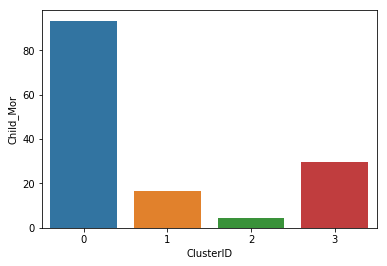

In [132]:
#plotting barplot for Child_Mor
sns.barplot(x=final_cluster_hierarchy.ClusterID, y=final_cluster_hierarchy.Child_Mor)

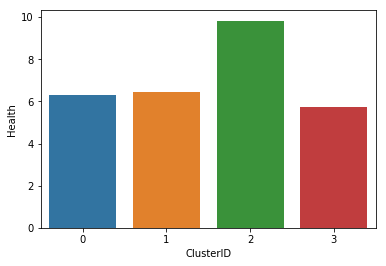

In [133]:
#plotting barplot for Health
sns.barplot(x=final_cluster_hierarchy.ClusterID, y=final_cluster_hierarchy.Health)

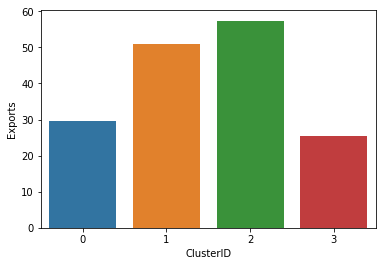

In [134]:
#plotting barplot for Exports
sns.barplot(x=final_cluster_hierarchy.ClusterID, y=final_cluster_hierarchy.Exports)

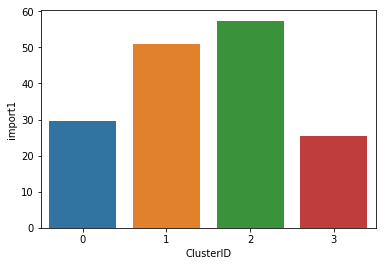

In [135]:
#plotting barplot for import1
sns.barplot(x=final_cluster_hierarchy.ClusterID, y=final_cluster_hierarchy.import1)

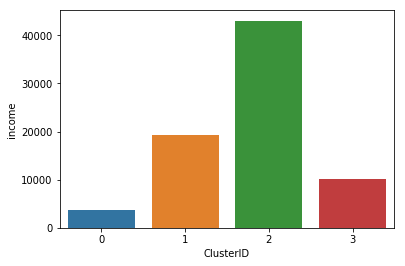

In [136]:
#plotting barplot for income
sns.barplot(x=final_cluster_hierarchy.ClusterID, y=final_cluster_hierarchy.income)

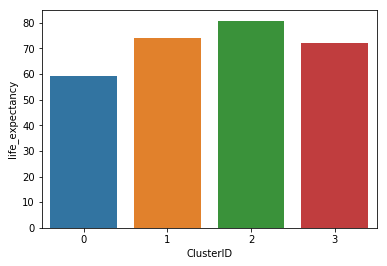

In [137]:
#plotting barplot for life_expectancy
sns.barplot(x=final_cluster_hierarchy.ClusterID, y=final_cluster_hierarchy.life_expectancy)

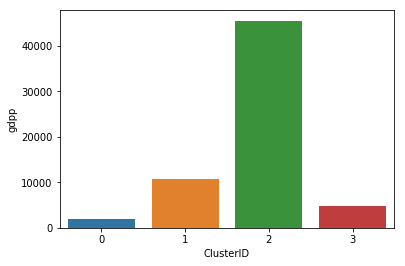

In [138]:
#plotting barplot for gdpp
sns.barplot(x=final_cluster_hierarchy.ClusterID, y=final_cluster_hierarchy.gdpp)

## Cluster 2 has highest GDP,life_expectancy,income,export,import,health and  low in inflation ,child mortality,total_fertility
## Cluster 1 has higher GDP,life_expectancy,income,export,import,health spending and lowest inflation,child mortality, 
## Cluster 3 has lower GDP,imports ,export, income,export,import and  higher inflation,child mortality, 
## Cluster 0 has lowest GDP,income,health,life_expectancy and highest inflation,child
